# Import libraries

In [1]:
import pandas as pd

# Recipes dataset

In [2]:
recipes = pd.read_csv('../dataset/RAW_recipes.csv')

In [3]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [4]:
recipes.shape

(231637, 12)

In [5]:
recipes.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [6]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [7]:
# Missing values in terms of percentage
recipes.isnull().sum() / len(recipes) * 100

name              0.000432
id                0.000000
minutes           0.000000
contributor_id    0.000000
submitted         0.000000
tags              0.000000
nutrition         0.000000
n_steps           0.000000
steps             0.000000
description       2.149484
ingredients       0.000000
n_ingredients     0.000000
dtype: float64

In [8]:
# drop the columns with missing values as they are a fraction of the dataset
recipes.dropna(axis=1, inplace=True)

<Axes: >

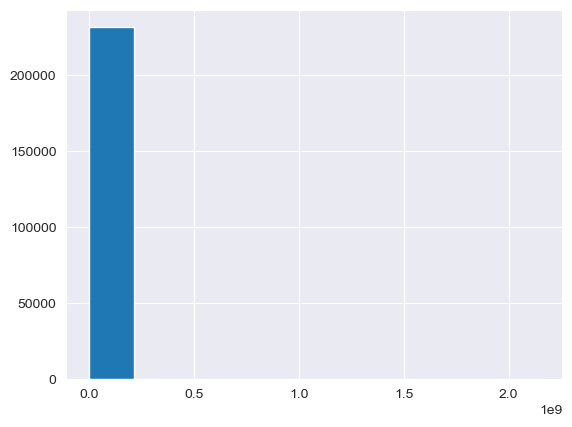

In [9]:
# plot the distribution of minutes to prepare
recipes.minutes.hist()

In [10]:
# There seems to be some outliers in the minutes column
min_time = recipes.minutes.min()
max_time = recipes.minutes.max()
print("Min time: ", min_time)
print("Max time: ", max_time)

Min time:  0
Max time:  2147483647


In [11]:
# recipes that take more than 4 hours to prepare
recipes[recipes.minutes > 60 * 4]

,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients
11,42198,1460,41531,2002-10-03,"['weeknight', 'time-to-make', 'course', 'main-...","[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]",8,['crush vanilla wafers into fine crumbs and li...,"['vanilla wafers', 'butter', 'powdered sugar',...",7
12,67547,2970,85627,2003-07-26,"['weeknight', 'time-to-make', 'course', 'main-...","[462.4, 28.0, 214.0, 69.0, 14.0, 29.0, 23.0]",9,['in a very large sauce pan cover the beans an...,"['great northern bean', 'chicken bouillon cube...",13
13,107517,525,137696,2005-01-03,"['time-to-make', 'main-ingredient', 'preparati...","[315.8, 0.0, 202.0, 9.0, 6.0, 0.0, 21.0]",7,"['put prepared greens in large pot', 'add wate...","['collard greens', 'brown sugar', 'molasses', ...",7
15,63986,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...","['lean pork chops', 'flour', 'salt', 'dry must...",7
27,47366,495,31871,2002-11-21,"['weeknight', 'time-to-make', 'course', 'main-...","[346.9, 24.0, 18.0, 42.0, 42.0, 30.0, 10.0]",5,"['in a slow cooker , combine the first nine in...","['beef stew meat', 'water', 'tomatoes', 'beef ...",14
...,...,...,...,...,...,...,...,...,...,...
231232,158292,255,47892,2006-03-02,"['time-to-make', 'course', 'main-ingredient', ...","[54.4, 5.0, 12.0, 0.0, 3.0, 2.0, 1.0]",9,['toss the thinly sliced zucchini with the lem...,"['zucchini', 'lemon, juice of', 'garlic cloves...",7
231355,462992,2900,1403860,2011-08-24,"['time-to-make', 'course', 'main-ingredient', ...","[64.5, 0.0, 44.0, 53.0, 3.0, 0.0, 4.0]",27,['day one: in a large bowl or stainless pan co...,"['zucchini', 'sweet white onions', 'green bell...",17
231549,181958,540,89831,2006-08-15,"['time-to-make', 'course', 'main-ingredient', ...","[616.3, 73.0, 11.0, 70.0, 71.0, 113.0, 3.0]",15,"['grease a 13 x 9-inch baking dish', 'in a ski...","['italian sausages', 'green onions', 'fresh ga...",12
231573,316950,2895,62264,2008-07-31,"['time-to-make', 'course', 'main-ingredient', ...","[343.6, 2.0, 284.0, 194.0, 5.0, 0.0, 25.0]",13,"['wash and trim the zucchini , then slice them...","['zucchini', 'yellow onion', 'kosher salt', 'c...",8


In [12]:
# drop the rows with minutes > 4 hours
recipes = recipes[recipes.minutes < 60 * 4]

<Axes: >

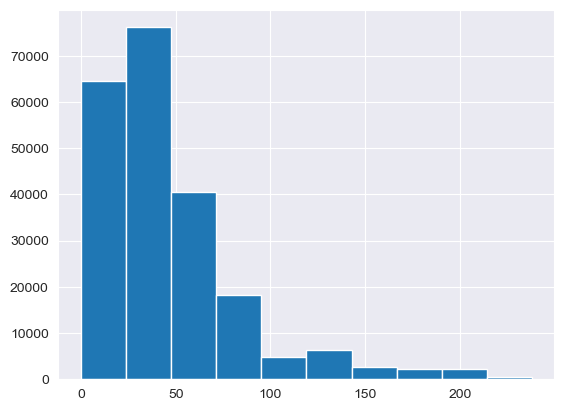

In [13]:
# plot the distribution of minutes to prepare, add a title and labels to the axes
recipes.minutes.hist()

In [14]:
# top 10 contributors
recipes.contributor_id.value_counts().head(10)

89831     2795
37449     2435
37779     2398
1533      1545
58104     1482
169430    1319
80353     1089
4470      1061
283251     962
21752      870
Name: contributor_id, dtype: int64

<Axes: >

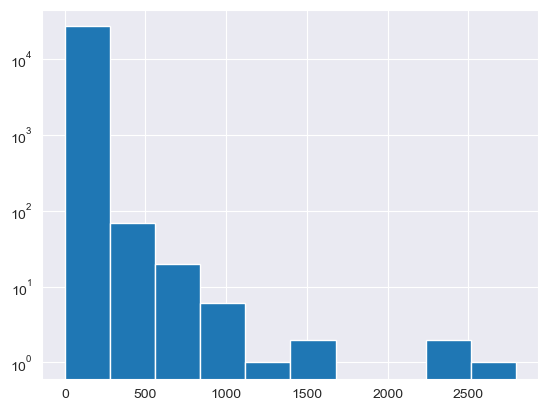

In [15]:
# distribution of recipes by contributor
recipes.contributor_id.value_counts().hist(log=True)

In [16]:
# number of unique contributors
print("Number of unique contributors: ", len(recipes.contributor_id.unique()))

Number of unique contributors:  27021


In [17]:
import re

# number of unique tags
tag_list = [tag_list.split(',') for tag_list in recipes.tags]
tag_list = [item.strip() for sublist in tag_list for item in sublist]
# remove special characters except - and " "
tag_list = [re.sub('[^A-Za-z0-9\s\-"]+', '', tag) for tag in tag_list]
print("Number of unique tags: ", len(set(tag_list)))

Number of unique tags:  512


In [18]:
# Frequency of each tag
from collections import Counter
tag_counts = Counter(tag_list)
pd.DataFrame(tag_counts.most_common(10), columns=['tag', 'count'])

,tag,count
0,preparation,218080
1,time-to-make,217930
2,course,205703
3,main-ingredient,159825
4,dietary,155865
5,easy,119152
6,occasion,107442
7,cuisine,85943
8,low-in-something,80643
9,60-minutes-or-less,69986


<Axes: xlabel='tag'>

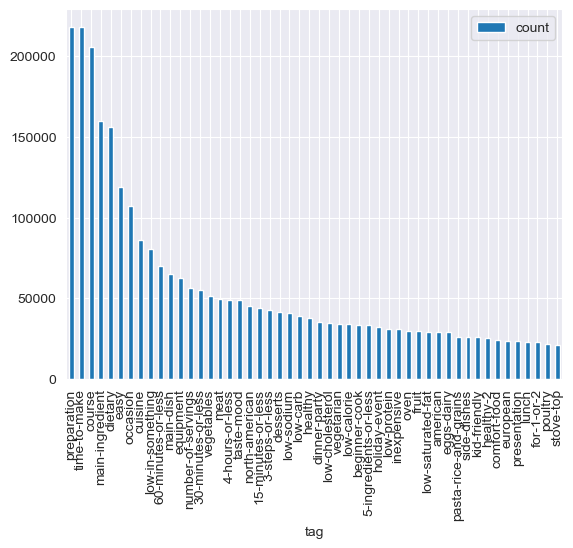

In [19]:
# plot the distribution of tags
pd.DataFrame(tag_counts.most_common(50), columns=['tag', 'count']).plot.bar(x='tag')

In [20]:
import numpy as np

# nutrition = (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat)
# add new columns for calories, total_fat, sugar, sodium, protein, saturated_fat
# nutrition is string = '[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]'
# extract the numbers from the string using numpy
recipes['calories'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[0])
recipes['total_fat'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[1])
recipes['sugar'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[2])
recipes['sodium'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[3])
recipes['protein'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[4])
recipes['saturated_fat'] = recipes.nutrition.apply(lambda x: np.nan if pd.isnull(x) else eval(x)[5])

In [21]:
recipes.head(5)

,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat
0,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0
1,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0
2,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0
3,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0
4,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0


In [22]:
# drop the nutrition column
recipes.drop('nutrition', axis=1, inplace=True)

In [23]:
# find missing values in the nutrition columns
recipes.isnull().sum()

id                0
minutes           0
contributor_id    0
submitted         0
tags              0
n_steps           0
steps             0
ingredients       0
n_ingredients     0
calories          0
total_fat         0
sugar             0
sodium            0
protein           0
saturated_fat     0
dtype: int64

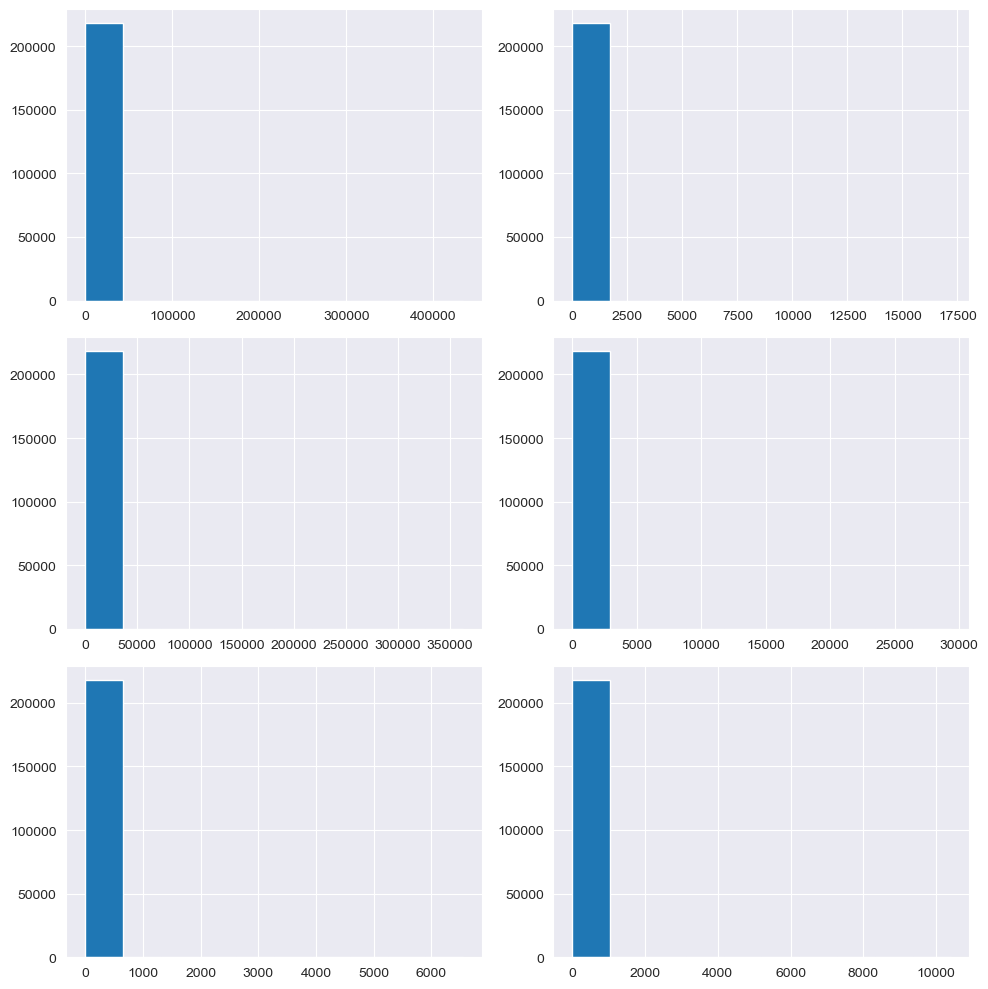

In [24]:
# print the distribution of each nutrition column in a single graph using matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
recipes.calories.hist(ax=axes[0, 0])
recipes.total_fat.hist(ax=axes[0, 1])
recipes.sugar.hist(ax=axes[1, 0])
recipes.sodium.hist(ax=axes[1, 1])
recipes.protein.hist(ax=axes[2, 0])
recipes.saturated_fat.hist(ax=axes[2, 1])

plt.tight_layout()
plt.show()

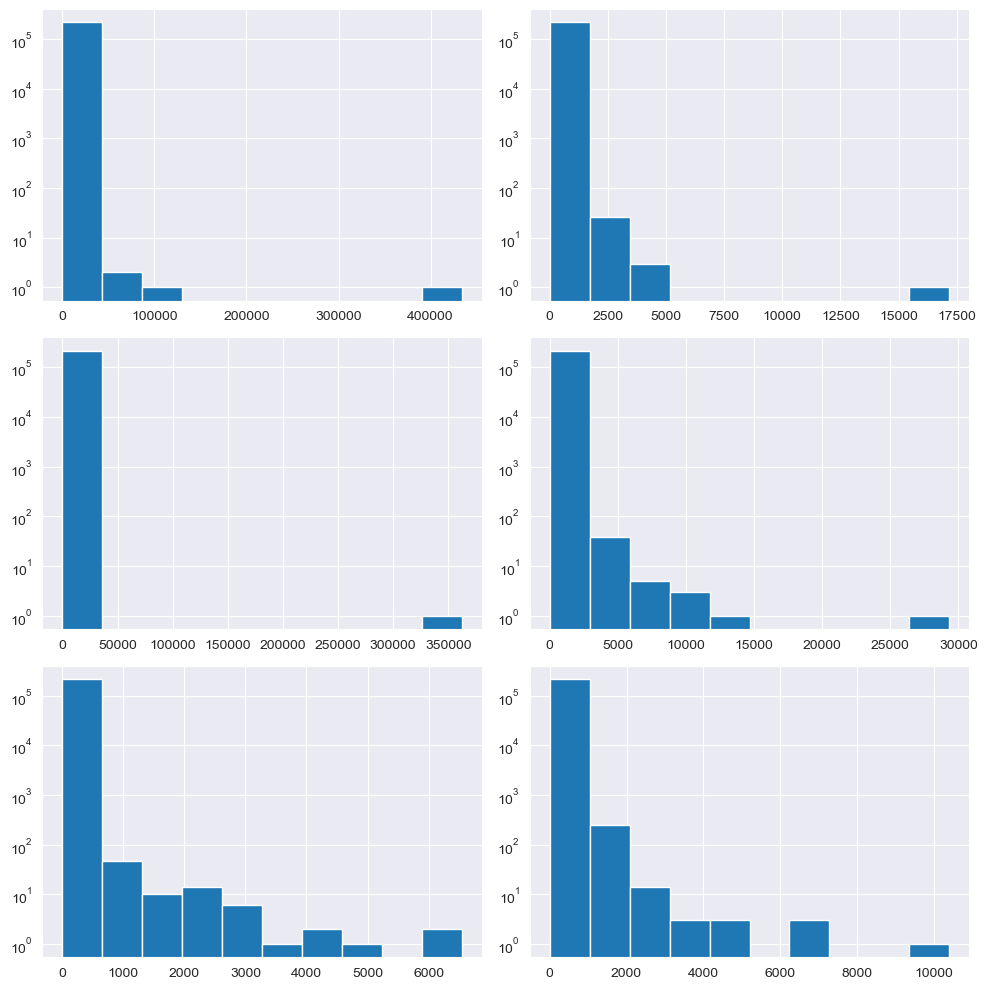

In [25]:
# there are some outliers in the data, remove them
# let's plot a log scale to see the distribution
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
recipes.calories.hist(ax=axes[0, 0], log=True)
recipes.total_fat.hist(ax=axes[0, 1], log=True)
recipes.sugar.hist(ax=axes[1, 0], log=True)
recipes.sodium.hist(ax=axes[1, 1], log=True)
recipes.protein.hist(ax=axes[2, 0], log=True)
recipes.saturated_fat.hist(ax=axes[2, 1], log=True)

plt.tight_layout()
plt.show()

In [26]:
recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat
count,218292.000000,218292.000000,2.182920e+05,218292.000000,218292.000000,218292.000000,218292.000000,218292.000000,218292.000000,218292.000000,218292.00000
mean,222362.845024,45.923002,5.364433e+06,9.711144,9.017248,467.552287,35.676333,83.107068,28.837956,33.476454,45.12623
std,141167.718416,38.794019,9.804992e+07,5.856390,3.701491,1199.538077,77.237068,814.978411,122.167983,56.112817,96.38159
min,40.000000,0.000000,2.700000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,100311.750000,20.000000,5.704200e+04,6.000000,6.000000,172.200000,8.000000,9.000000,5.000000,6.000000,7.00000
50%,207951.000000,35.000000,1.754920e+05,9.000000,9.000000,309.400000,20.000000,24.000000,14.000000,18.000000,22.00000
75%,334435.250000,60.000000,4.007080e+05,12.000000,11.000000,513.800000,40.000000,67.000000,32.000000,49.000000,52.00000
max,537716.000000,238.000000,2.002290e+09,145.000000,43.000000,434360.200000,17183.000000,362729.000000,29338.000000,6552.000000,10395.00000


In [27]:
# remove values of nutrition columns that are more than 3 standard deviations away from the mean
recipes = recipes[np.abs(recipes.calories - recipes.calories.mean()) <= (3 * recipes.calories.std())]
recipes = recipes[np.abs(recipes.total_fat - recipes.total_fat.mean()) <= (3 * recipes.total_fat.std())]
recipes = recipes[np.abs(recipes.sugar - recipes.sugar.mean()) <= (3 * recipes.sugar.std())]
recipes = recipes[np.abs(recipes.sodium - recipes.sodium.mean()) <= (3 * recipes.sodium.std())]
recipes = recipes[np.abs(recipes.protein - recipes.protein.mean()) <= (3 * recipes.protein.std())]
recipes = recipes[np.abs(recipes.saturated_fat - recipes.saturated_fat.mean()) <= (3 * recipes.saturated_fat.std())]

<Axes: >

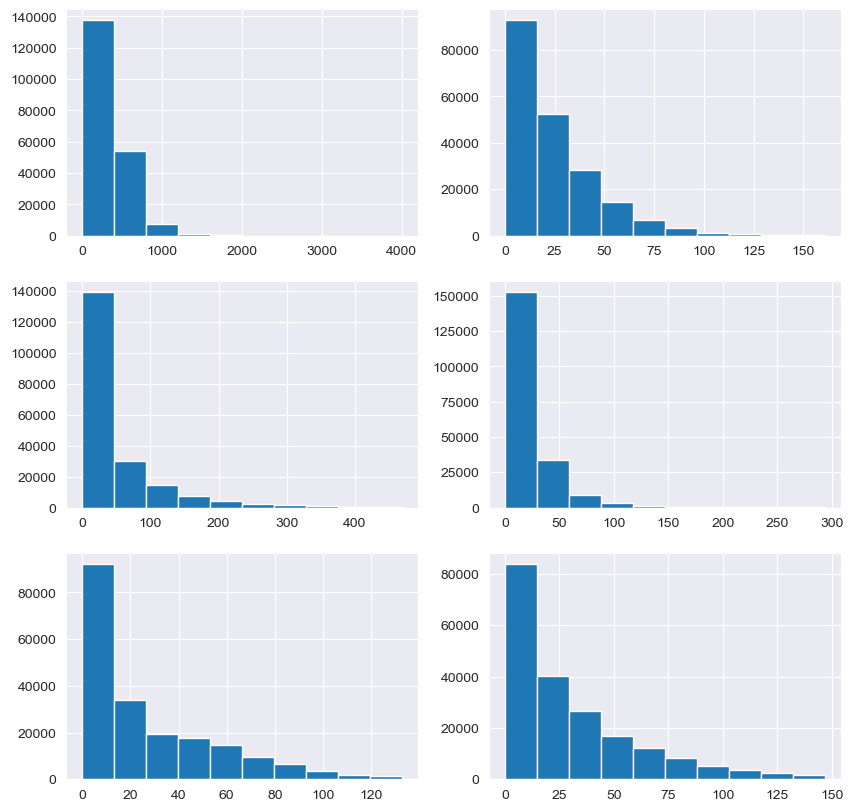

In [28]:
# plot the distribution of each nutrition column in a single graph using matplotlib
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
recipes.calories.hist(ax=axes[0, 0])
recipes.total_fat.hist(ax=axes[0, 1])
recipes.sugar.hist(ax=axes[1, 0])
recipes.sodium.hist(ax=axes[1, 1])
recipes.protein.hist(ax=axes[2, 0])
recipes.saturated_fat.hist(ax=axes[2, 1])

<Axes: >

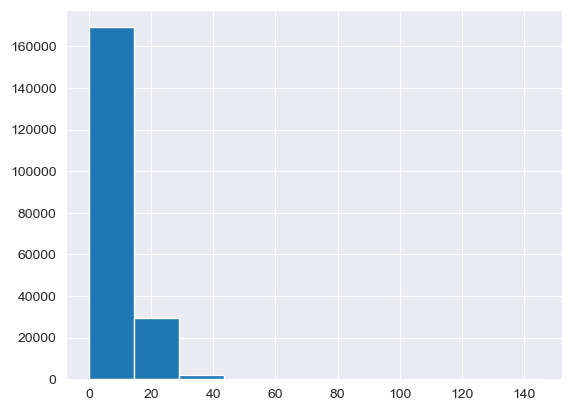

In [29]:
# distribution of n_steps
recipes.n_steps.hist()

<Axes: >

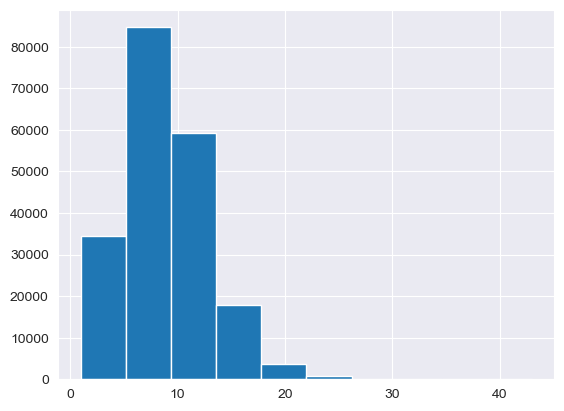

In [30]:
# distribution of n_ingredients
recipes.n_ingredients.hist()

# Interactions Dataset

In [32]:
# read the interactions dataset
interactions = pd.read_csv('../dataset/RAW_interactions.csv')

In [33]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [34]:
# number of rows and columns
interactions.shape

(1132367, 5)

In [35]:
# missing values in the dataset in terms of percentage
interactions.isnull().sum() / interactions.shape[0] * 100

user_id      0.000000
recipe_id    0.000000
date         0.000000
rating       0.000000
review       0.014924
dtype: float64

In [36]:
# replace missing review with empty string
interactions.review = interactions.review.fillna('')

In [37]:
# number of unique users
print("Number of unique users: ", len(interactions.user_id.unique()))

Number of unique users:  226570


In [38]:
# number of unique recipes
print("Number of unique recipes: ", len(interactions.recipe_id.unique()))

Number of unique recipes:  231637


<Axes: >

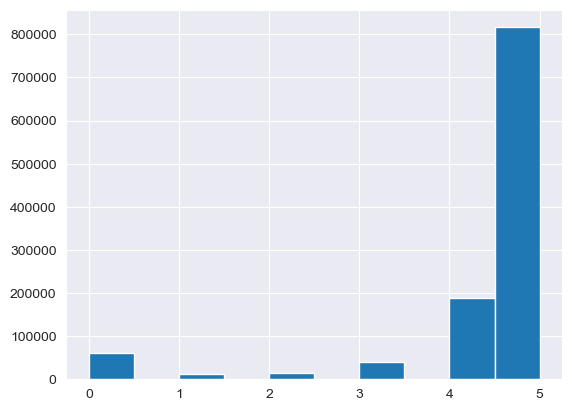

In [39]:
# distribution of ratings
interactions.rating.hist()